# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palma soriano
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | sur
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | vega de alatorre
Processing Record 7 of Set 1 | motygino
Processing Record 8 of Set 1 | whitehorse
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | maumere
Processing Record 11 of Set 1 | al ghayzah
Processing Record 12 of Set 1 | novodvinsk
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | pimentel
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | dudinka
Processing Record 18 of Set 1 | rutland
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | caleta de carquin
Processing Reco

Processing Record 41 of Set 4 | meadow lake
Processing Record 42 of Set 4 | buhe
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | kadnikov
Processing Record 46 of Set 4 | tofol
Processing Record 47 of Set 4 | bikenibeu village
Processing Record 48 of Set 4 | punta arenas
Processing Record 49 of Set 4 | eydhafushi
Processing Record 0 of Set 5 | noumea
Processing Record 1 of Set 5 | ust'-kut
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | mandal
Processing Record 4 of Set 5 | basco
Processing Record 5 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 5 | ibiza
Processing Record 7 of Set 5 | ambon
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | hirara
Processing Record 10 of Set 5 | mount isa
Processing Record 11 of Set 5 | yung shue wan
Processing Record 12 of Set 5 | kamaishi
Processing Record 13 of Set 5 | san luis de la loma
Processing Record 14 of Set 5 | 

Processing Record 40 of Set 8 | la passe
Processing Record 41 of Set 8 | funafuti
Processing Record 42 of Set 8 | mount gambier
Processing Record 43 of Set 8 | fale old settlement
Processing Record 44 of Set 8 | novopskov
Processing Record 45 of Set 8 | merizo village
Processing Record 46 of Set 8 | kuala tungkal
Processing Record 47 of Set 8 | colonia
Processing Record 48 of Set 8 | valparaiso
Processing Record 49 of Set 8 | callao
Processing Record 0 of Set 9 | at taraf
Processing Record 1 of Set 9 | kisangani
Processing Record 2 of Set 9 | chernyshevskiy
Processing Record 3 of Set 9 | tazacorte
Processing Record 4 of Set 9 | lafollette
Processing Record 5 of Set 9 | hulan ergi
Processing Record 6 of Set 9 | rovaniemi
Processing Record 7 of Set 9 | altai
Processing Record 8 of Set 9 | puerto deseado
Processing Record 9 of Set 9 | onega
Processing Record 10 of Set 9 | kindia
Processing Record 11 of Set 9 | aripuana
Processing Record 12 of Set 9 | rio gallegos
Processing Record 13 of S

Processing Record 26 of Set 12 | yazman
Processing Record 27 of Set 12 | leava
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palma soriano,20.2172,-75.9989,85.06,43,59,7.29,CU,1714505638
1,tura,25.5198,90.2201,76.89,91,18,9.53,IN,1714505638
2,longyearbyen,78.2186,15.6401,33.64,80,75,8.05,SJ,1714505638
3,sur,22.5667,59.5289,84.87,52,45,9.93,OM,1714505638
4,adamstown,-25.0660,-130.1015,74.12,76,68,12.33,PN,1714505638


In [12]:
# Export the City_Data into a csv
import os 

output_dir= 'output_data'

#creating directory

os.makedirs(output_dir)

print(f"Directory '{output_dir}' created successfully.")

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

Directory 'output_data' created successfully.


In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palma soriano,20.2172,-75.9989,85.06,43,59,7.29,CU,1714505638
1,tura,25.5198,90.2201,76.89,91,18,9.53,IN,1714505638
2,longyearbyen,78.2186,15.6401,33.64,80,75,8.05,SJ,1714505638
3,sur,22.5667,59.5289,84.87,52,45,9.93,OM,1714505638
4,adamstown,-25.0660,-130.1015,74.12,76,68,12.33,PN,1714505638


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

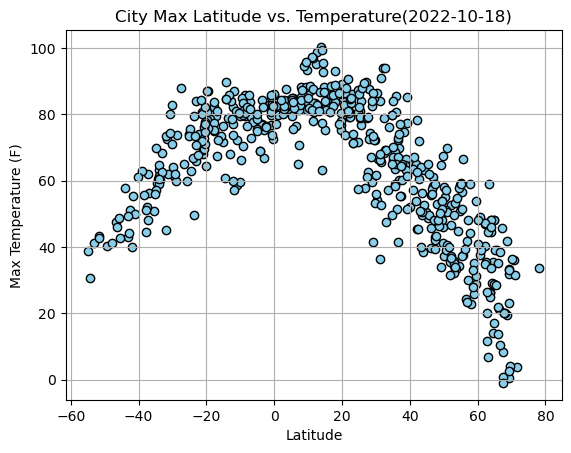

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

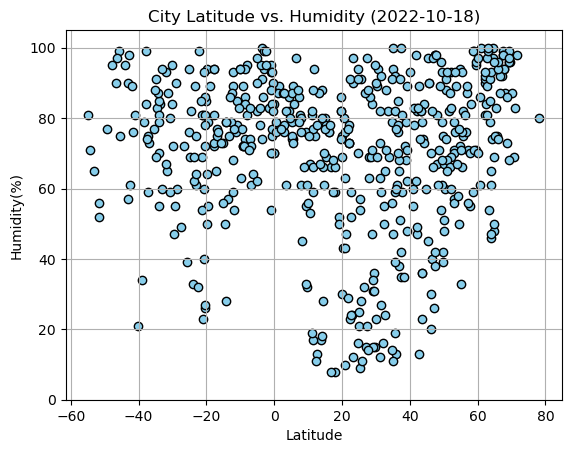

In [18]:
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.ylim(0,105)
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

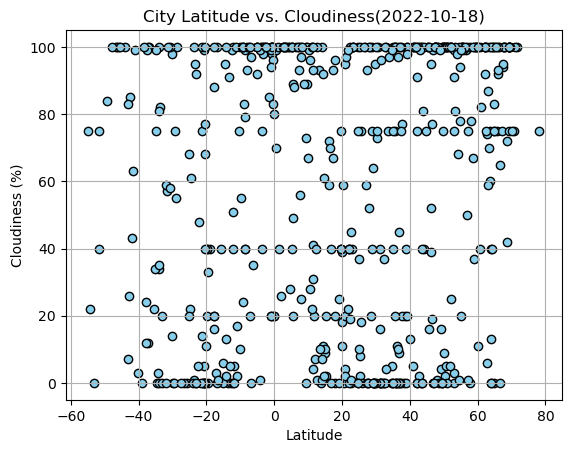

In [19]:
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

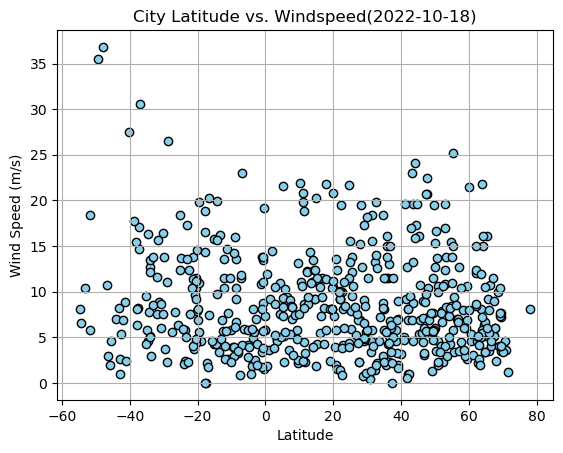

In [20]:
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Windspeed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def plt_linear_regression(x_values,y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Labels
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palma soriano,20.2172,-75.9989,85.06,43,59,7.29,CU,1714505638
1,tura,25.5198,90.2201,76.89,91,18,9.53,IN,1714505638
2,longyearbyen,78.2186,15.6401,33.64,80,75,8.05,SJ,1714505638
3,sur,22.5667,59.5289,84.87,52,45,9.93,OM,1714505638
5,vega de alatorre,20.0333,-96.6333,86.11,69,18,10.56,MX,1714505638


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,74.12,76,68,12.33,PN,1714505638
8,waitangi,-43.9535,-176.5597,57.81,95,100,7.00,NZ,1714505638
9,maumere,-8.6199,122.2111,79.41,86,99,6.67,ID,1714505638
12,puerto natales,-51.7236,-72.4875,43.25,56,75,5.75,CL,1714505493
13,pimentel,-6.8367,-79.9342,79.09,61,0,23.02,PE,1714505638


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8660807930678259


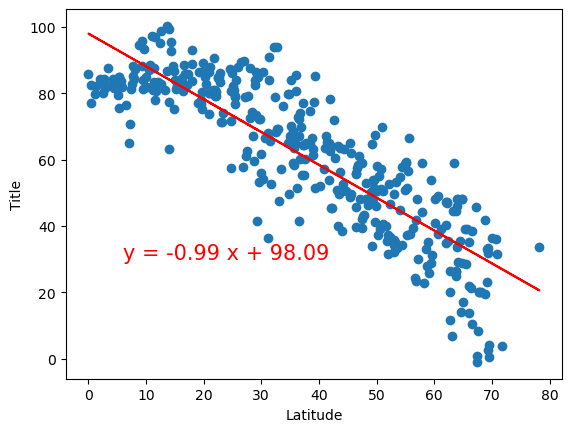

In [32]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df ["Lat"]
y_values= northern_hemi_df["Max Temp"]
plt_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.787638077496276


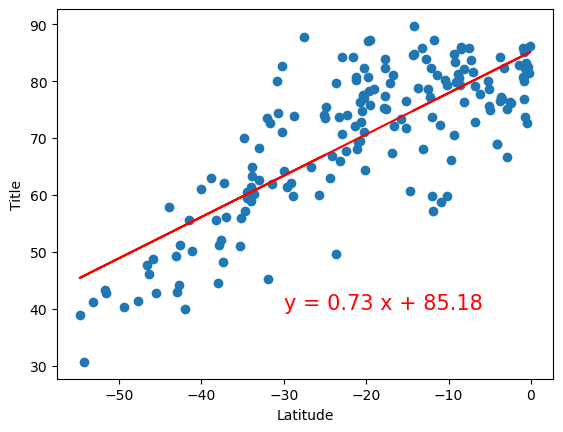

In [33]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df ["Lat"]
y_values= southern_hemi_df["Max Temp"]
plt_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2519974023058978


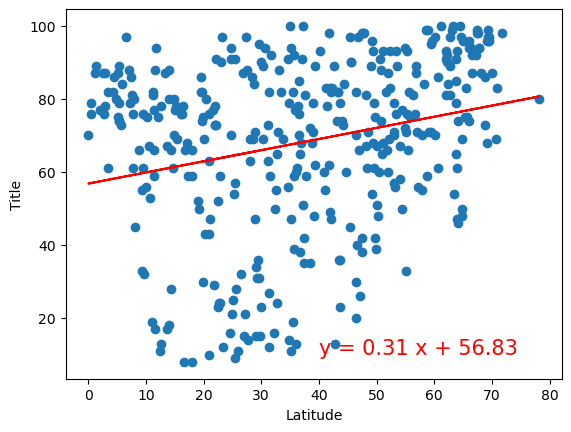

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.1309397697687286


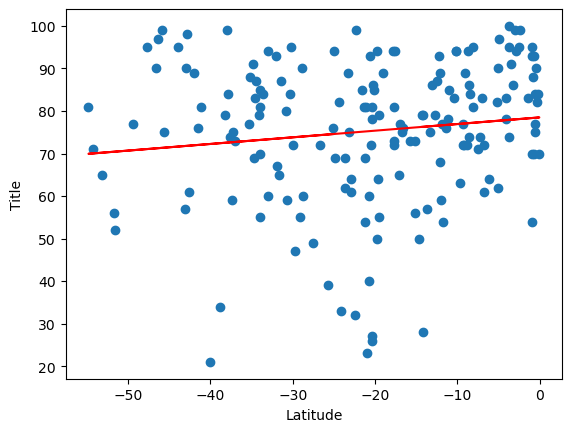

In [35]:
# Southern Hemisphere
x_values= southern_hemi_df ["Lat"]
y_values= southern_hemi_df["Humidity"]
plt_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.17106775437841404


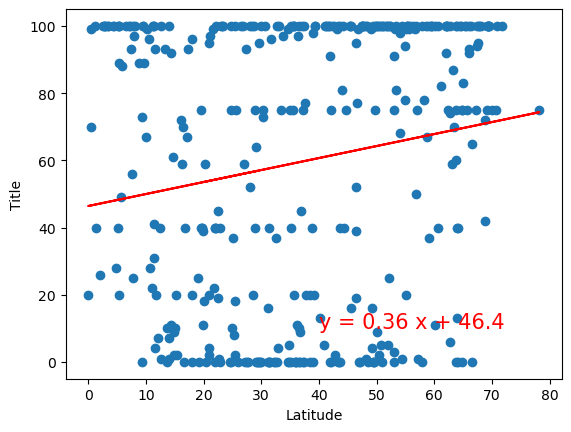

In [36]:
# Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.1432196265349632


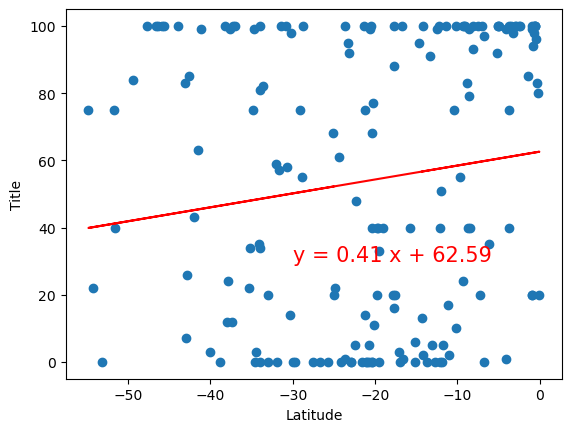

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.05579564219993219


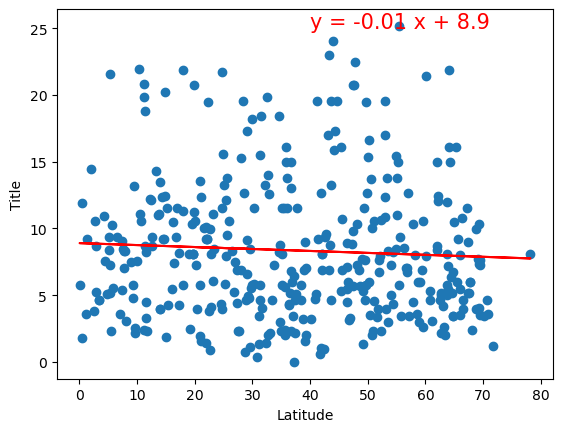

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.22318199587297244


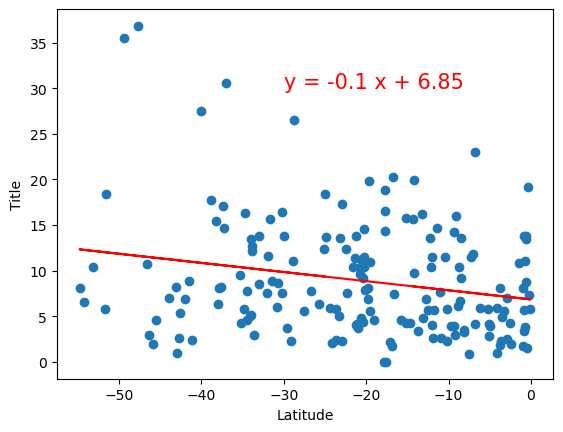

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE